### SOM - Self Organizing Maps

A seguir, temos uma implementação de Mapas auto organizáveis, que indica fraudes em cartões de crédito. O data-set contém o id do cliente, alguns atributos, como saldos e outras informações relevantes para uma análise de crédito e se o cliente teve seu cadastro aprovado ou não. A ideia aqui não é prever se o cliente vai ser aprovado ou não, e sim detectar possíveis clientes fraudulentos através do mapa.

##### Notas sobre o dataset

A última coluna do dataset contém a informação se o cliente teve ou não seu cadastro aprovado. Os que Como dito anteriormente, nós não queremos prever se ele foi aprovado ou não, essa informação vai ser útil somente para "investigar" somente aqueles que importam, ou seja, que tiveram seu cadastro aprovado. Para um banco, não interessa quem não foi aprovado pois isso não vai dar prejuízo, diferentemente dos que foram aprovados e cometeram fraudes.

---

### Preparação dos dados
##### Importando as bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

###### Importando o dataset

In [2]:
dataset = pd.read_csv('Credit_Card_Applications.csv')

###### Selecionando as features

A última coluna contém a informação que diz se o cliente teve seu cadastro aprovado ou não. Removemos essa coluna porque ela não deve influenciar no algoritmo.

In [3]:
X = dataset.iloc[:, :-1].values

Separamos a última coluna do dataset em uma variável para usarmos depois no mapa. Isso vai ajudar a identificar os pontos que contém fraudes e clientes que tiveram seu cadastro aprovado ao mesmo tempo, ou seja, aquilo que interessa nesse caso: clientes aprovados e que possuem fraudes.

In [4]:
Y = dataset.iloc[:, -1].values

###### Normalizando as features

Precisamos normalizar os valores presentes nas features, ou seja, colocar em um range entre 0 e 1. Ficará mais fácil para o algoritmo fazer os cálculos.

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1)) # feature will be between 0 and 1, that's normalization
X = sc.fit_transform(X) # normalize all the informations in X

### Treinamento do algoritmo
##### Importação de uma implementação de SOM

In [6]:
from minisom import MiniSom

`x` e `y` representam uma dimensão arbitrária (10x10)
`input_len` é o tamanho da entrada. Recebe 15 porque a variável `X` que contém os dados tem 14 features e 1 que contém o id do cliente para identificar os fraudulentos (outliers).
`sigma` representa o raio de diferentes vizinhos no mapa (distância entre vizinhos). Usamos o valor padrão que é 1.0
`learning_rate` é taxa de aprendizagem que representa a quantas vezes os pesos serão atualizados. Usamos o valor padrão que é 0.5

In [7]:
som = MiniSom(x = 10, y = 10, input_len= 15)

Inicialização aleatória dos pesos iniciais com valores próximos a zero e diferentes de zero.

In [8]:
som.random_weights_init(X)

Passamos os dados para treinamento e o número de interações.

In [9]:
som.train_random(X, 5000)

### Visualização dos Resultados
##### Importação das bibliotecas para visualização

In [10]:
from pylab import bone, pcolor, colorbar, plot, show

Inicializando a figura que contém o mapa.

As fraudes (outliers) são identificadas pelas cores claras. Isso acontece porque as cores com tons escuros representam os nodes que contém vizinhos muito próximos. Ou seja, os nodes estão agrupados em uma região com uma densidade alta de nodes e isso é representado por tons escuros. Sendo assim, as cores com tons mais claros representam os outliers.

Para cada node teremos marcadores para identificar alguns alvos círculos vermelhos = não aprovados quadrados verdes = aprovados

Isso porque queremos identificar as fraudes daqueles que tiverem seu cadastro aprovado, faz mais sentido dessa forma.

Vamos percorrer o map e colocar os marcadores. i para as linhas e X para o vetor que representa os clientes (X contém os ids)

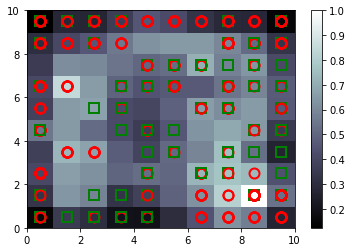

In [11]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[Y[i]],
         markeredgecolor = colors[Y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()